In [1]:
import os
import numpy as np
caffe_root = '/home/flathead/bitbucket/mycaffe/'
os.chdir('../../')
import sys
sys.path.insert(0, 'python')
import caffe

In [2]:
from pylab import *
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [4]:
caffe.set_mode_gpu()
caffe.set_device(0)

In [5]:
net1 = caffe.Net('examples/mnist/lenet_train_test.prototxt',
                'examples/mnist/lenet_iter_50000.caffemodel', 
                 caffe.TEST)

In [15]:
feat1 = net1.params['ip1'][0].data
feat2 = net1.params['ip2'][0].data

In [16]:
l1 = 1024
l2 = 10

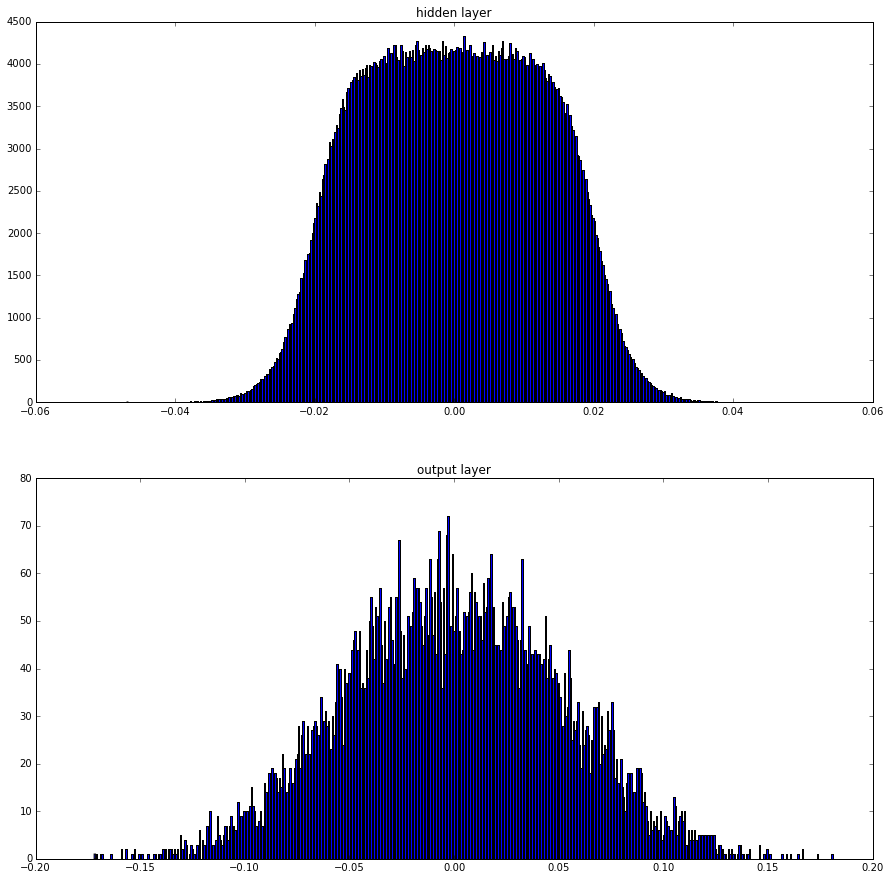

In [17]:
plt.figure(figsize=(15, 15))

plt.subplot(2,1,1)
plt.hist(feat1.flat, bins = 500)
plt.title("hidden layer")

plt.subplot(2,1,2)
plt.hist(feat2.flat, bins = 500)
plt.title("output layer")

In [ ]:
# Pruning Here!

In [18]:
#Neurons of Layer 1
mean_feat1 = [0] * l1
std_feat1 = [0] * l1

for j in range(l1):
    mean_feat1[j] = feat1[j].mean()
    std_feat1[j] = feat1[j].std()
    
#Neurons of Layer 2
mean_feat2 = [0] * l2
std_feat2 = [0] * l2

for j in range(l2):
    mean_feat2[j] = feat2[j].mean()
    std_feat2[j] = feat2[j].std()

In [19]:
#Neurons of Layer 1
posm_feat1 = [0] * l1
negm_feat1 = [0] * l1
poss_feat1 = [0] * l1
negs_feat1 = [0] * l1

for j in range(l1):
    posm_feat1[j] = feat1[j][feat1[j] > 0].mean()
    negm_feat1[j] = feat1[j][feat1[j] < 0].mean()
    poss_feat1[j] = feat1[j][feat1[j] > 0].std()
    negs_feat1[j] = feat1[j][feat1[j] < 0].std()
    
#Neurons of Layer 2
posm_feat2 = [0] * l2
negm_feat2 = [0] * l2
poss_feat2 = [0] * l2
negs_feat2 = [0] * l2

for j in range(l2):
    posm_feat2[j] = feat2[j][feat2[j] > 0].mean()
    negm_feat2[j] = feat2[j][feat2[j] < 0].mean()
    poss_feat2[j] = feat2[j][feat2[j] > 0].std()
    negs_feat2[j] = feat2[j][feat2[j] < 0].std()

In [21]:
# rate * std range zero pruning
rate = 0.8

for x in range(l1):
    for y in range(800):
        if ((feat1[x,y] >= -std_feat1[x] * rate) & (feat1[x,y] <= rate * std_feat1[x])):
            feat1[x,y] = 0
            
for x in range(l2):
    for y in range(l1):
        if ((feat2[x,y] >= -std_feat2[x] * rate) & (feat2[x,y] <= rate * std_feat2[x])):
            feat2[x,y] = 0

In [22]:
net1.save('examples/mnist/zeropr/pruned.caffemodel')

In [23]:
ratio = zeros(2)

for x in range(l1):
    ratio[0] += (feat1[x] ==  0).sum()

for x in range(l2):
    ratio[1] += (feat2[x] ==  0).sum()
    

print (ratio[0] / (800 * l1), ratio[1] / (l2 * l1))
print ((ratio[0] + ratio[1]) / (800 * l1 + l1 * l2))

(0.49588378906250002, 0.55517578125)
0.496615788966


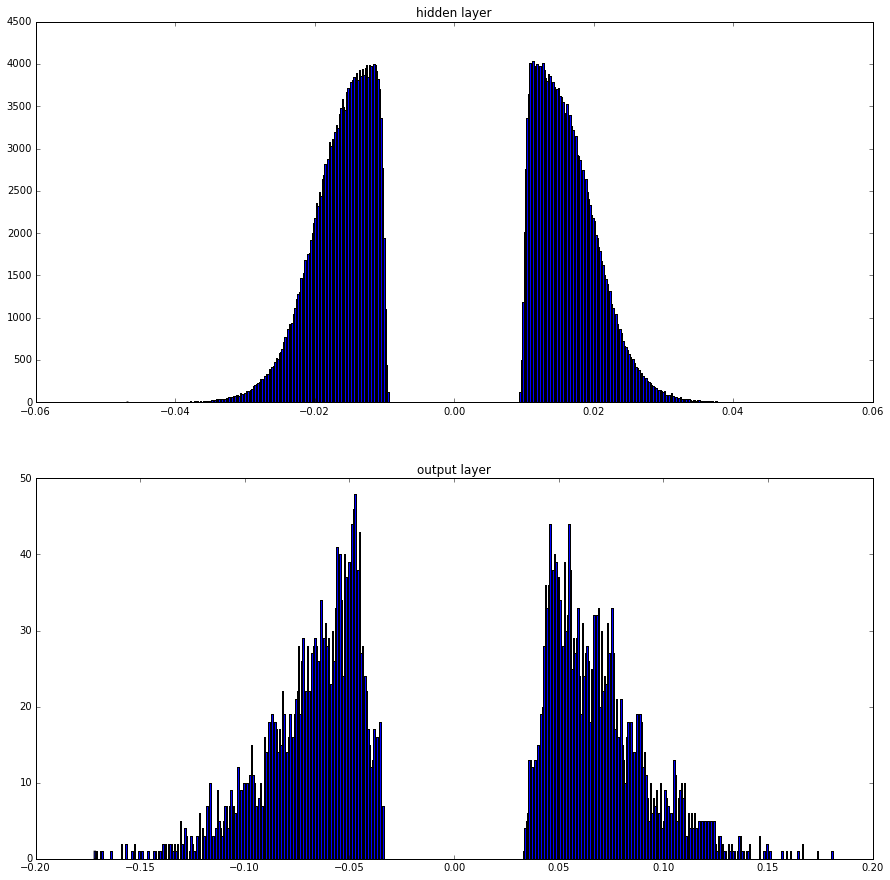

In [24]:
plt.figure(figsize=(15, 15))

plt.subplot(2,1,1)
plt.hist(feat1[feat1 != 0].flat, bins = 500)
plt.title("hidden layer")

plt.subplot(2,1,2)
plt.hist(feat2[feat2 != 0].flat, bins = 500)
plt.title("output layer")

In [ ]:
# Retraining is required Here!

In [25]:
net1 = None
net1 = caffe.Net('examples/mnist/retrain/retrain_train_test.prototxt',
                'examples/mnist/retrain/lenet_iter_20000.caffemodel', 
                 caffe.TEST)

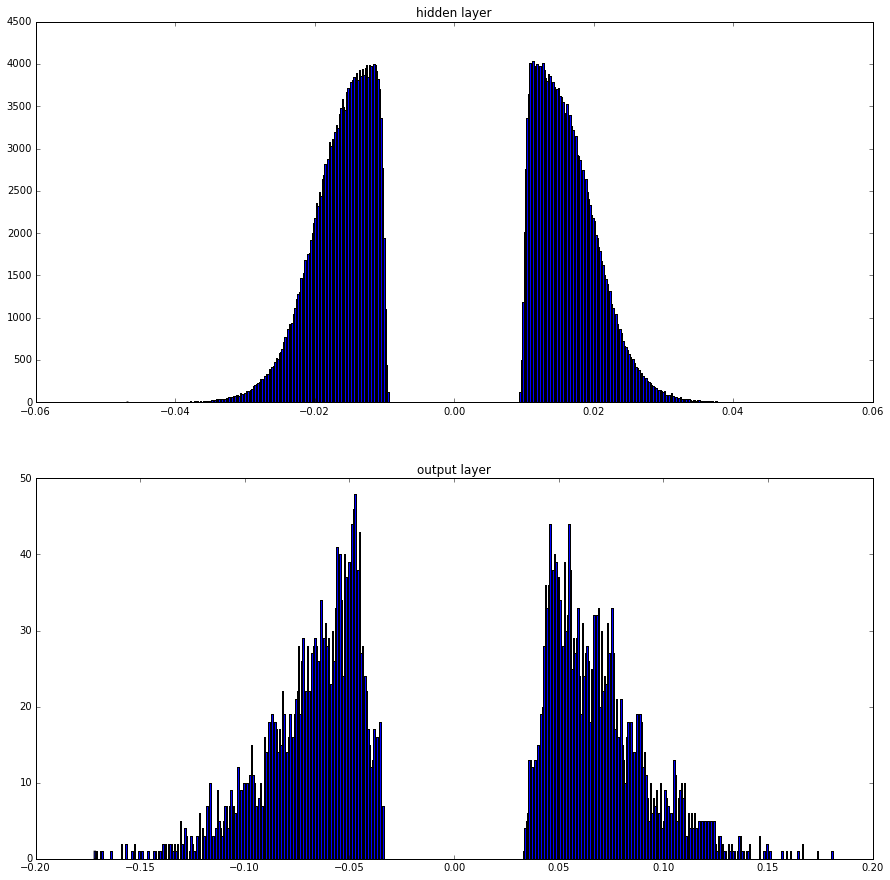

In [26]:
plt.figure(figsize=(15, 15))

plt.subplot(2,1,1)
plt.hist(feat1[feat1 != 0].flat, bins = 500)
plt.title("hidden layer")

plt.subplot(2,1,2)
plt.hist(feat2[feat2 != 0].flat, bins = 500)
plt.title("output layer")

In [ ]:
# Quantization Here!

In [27]:
#Neurons of Layer 1
mean_feat1 = [0] * l1
std_feat1 = [0] * l1

for j in range(l1):
    mean_feat1[j] = feat1[j].mean()
    std_feat1[j] = feat1[j].std()
    
#Neurons of Layer 2
mean_feat2 = [0] * l2
std_feat2 = [0] * l2

for j in range(l2):
    mean_feat2[j] = feat2[j].mean()
    std_feat2[j] = feat2[j].std()

In [28]:
#Neurons of Layer 1
posm_feat1 = [0] * l1
negm_feat1 = [0] * l1
poss_feat1 = [0] * l1
negs_feat1 = [0] * l1

for j in range(l1):
    posm_feat1[j] = feat1[j][feat1[j] > 0].mean()
    negm_feat1[j] = feat1[j][feat1[j] < 0].mean()
    poss_feat1[j] = feat1[j][feat1[j] > 0].std()
    negs_feat1[j] = feat1[j][feat1[j] < 0].std()
    
#Neurons of Layer 2
posm_feat2 = [0] * l2
negm_feat2 = [0] * l2
poss_feat2 = [0] * l2
negs_feat2 = [0] * l2

for j in range(l2):
    posm_feat2[j] = feat2[j][feat2[j] > 0].mean()
    negm_feat2[j] = feat2[j][feat2[j] < 0].mean()
    poss_feat2[j] = feat2[j][feat2[j] > 0].std()
    negs_feat2[j] = feat2[j][feat2[j] < 0].std()

In [30]:
# Mean value Quantization

for x in range(l1):
    for y in range(800):
        if (feat1[x][y] > 0):
            feat1[x][y] = posm_feat1[x]
        if (feat1[x][y] < 0):
            feat1[x][y] = negm_feat1[x]
            
for x in range(l2):
    for y in range(l1):
        if (feat2[x][y] > 0):
            feat2[x][y] = posm_feat2[x]
        if (feat2[x][y] < 0):
            feat2[x][y] = negm_feat2[x]

In [31]:
net1.save('examples/mnist/zeropr/quant.caffemodel')

In [ ]:
# Binarize Here!

In [32]:
# Same abolute values of posm and negm

for x in range(l1):
    for y in range(800):
        if (feat1[x][y] > 0):
            feat1[x][y] = (posm_feat1[x] - negm_feat1[x]) / 2
        if (feat1[x][y] < 0):
            feat1[x][y] = (negm_feat1[x] - posm_feat1[x]) / 2
            
for x in range(l2):
    for y in range(l1):
        if (feat2[x][y] > 0):
            feat2[x][y] = (posm_feat2[x] - negm_feat2[x]) / 2
        if (feat2[x][y] < 0):
            feat2[x][y] = (negm_feat2[x] - posm_feat2[x]) / 2

In [33]:
net1.save('examples/mnist/zeropr/sameabs.caffemodel')

In [34]:
ratio = zeros(2)

for x in range(l1):
    ratio[0] += (feat1[x] ==  0).sum()

for x in range(l2):
    ratio[1] += (feat2[x] ==  0).sum()
    

print (ratio[0] / (800 * l1), ratio[1] / (l2 * l1))
print ((ratio[0] + ratio[1]) / (800 * l1 + l1 * l2))

(0.49588378906250002, 0.55517578125)
0.496615788966
